# Clasificación Iris

### Caso de uso:

No disponemos de ninguna información sobre el propósito del modelo. No sabemos ni para que se va usar, ni cuando, ni como.

Estas aclaraciones nos secundan las tomas de decisiones a lo largo de la construcccion de Modelo.





### Importamos Librerías

In [2]:
import pandas as pd

from utils.Iris.locker import load_explore_iris, classification_iris


### Exploración de Datos


#### Dataset

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor).

El Dataset de  Iris cuenta solo con un total de 150 registos, 4 'Features' (Largo y ancho del sépalo y pétalo[en cm].) y un 'Target' multiclase (especie).

#### Pandas profiling

En la carpeta  de "/reports/", el fichero  "iris_profiling_report.html" nos proporciona un análisis exploratorio de datos completo. Observamos la distribución, la información general de cada varible y la correlación entre ellas.

Lo que nos permite observar una altísima correlación entre las variables. Esto motiva un PCA y así calcular unos datos que queden mejor representados y evitar  una matriz de registros colineares.

#### Missing Values.

Todos los datos vienen informados.

#### PCA

El PCA reduce la dimensinalidad del data set a  3 componentes principales con un 99.4% de varianza explicada. Tambien hemos introducido un estandarizado en el pipeline.

En el grafico 'Iris Distribution' (Representación PCA de datos multidimensionales) observamos la separación clara de la clase iris setosa dejando por otro lado la iris virginica  e iris versicolor con areas de distribución superpuestas.



[Dataset]



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



[Pandas_profiling]



Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


[PCA]
 

 Reducimos 1 dimension/es del conjunto de datos, con un 99.4% de la varianza explicada.


[PCA_distribution]



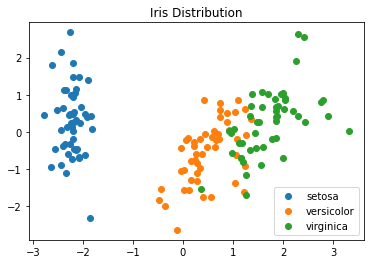

In [3]:
#%%time
# Load the data, generate the reports, treat the missing values and compute the PCA for Iris.
df_pca_iris, df_iris, fields_input_iris, fields_target_iris = load_explore_iris()

### Modelo

#### Eleccion de clasificadores

Teniendo un data set con 3 componentes y 150 registros tenemos que tener mucho cuidado para no elegir un modelo que se sobre-ajuste a los datos de entrenamiento. Para ello elegimos modelos simples que conocemos.

Los modelos elegidos para la evaluación son : Random Forest, Gradient Boosting, LinearSVC, Ridge Classifier, Logistic Regression. Aplicamos un GridSearchCV para tunear los parametros necesarios.




In [4]:
classification_iris(df_pca_iris, df_iris, fields_input_iris, fields_target_iris)

[Evaluation Metrics]

('random_forest__accuracy_train', 1.0)
('random_forest__accuracy_test', 0.9111111111111111)
('random_forest__f1_weighted', 0.9095022624434389)
('random_forest__cohen_kappa', 0.8666666666666667)
('random_forest__best_params', None)
('gradient_boosting__accuracy_train', 1.0)
('gradient_boosting__accuracy_test', 0.8666666666666667)
('gradient_boosting__f1_weighted', 0.8660714285714286)
('gradient_boosting__cohen_kappa', 0.8)
('gradient_boosting__best_params', None)
('svm_linear__accuracy_train', 0.9714285714285714)
('svm_linear__accuracy_test', 0.9777777777777777)
('svm_linear__f1_weighted', 0.9777530589543938)
('svm_linear__cohen_kappa', 0.9666666666666667)
('svm_linear__best_params', "{'C': 10}")
('ridge__accuracy_train', 0.8571428571428571)
('ridge__accuracy_test', 0.8222222222222222)
('ridge__f1_weighted', 0.8086124401913877)
('ridge__cohen_kappa', 0.7333333333333334)
('ridge__best_params', "{'alpha': 10, 'solver': 'svd'}")
('logistic_regression__accuracy_train',

#### Evaluación de Resultados

Obtenemos las diferentes metricas asociadas a la evaluación de cada modelo. Teniendo en cuenta que no tenemos  información de caso de uso, el clasificador con mejores metricas es el  KNeighbors classifiers o  el SVM Linear .

Parece que no queda sobre ajustado, aunque con tan pocos registros no se confirmar.

### Siguientes Pasos

Conseguir más datos para afinar el modelo, verificar el sobre ajuste, afinar la amplia gama de parámetros de los modelos selecionados y  aplicar algoritmos más complejos. 